In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras.datasets import cifar10
import cv2
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix

In [ ]:
(training_images, training_labels), (testing_images, testing_labels) = cifar10.load_data()


170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
print(np.unique(training_labels))
print(len(training_labels))


[0 1 2 3 4 5 6 7 8 9]
50000


In [ ]:
training_images.shape


(50000, 32, 32, 3)

In [ ]:
labels = {0:'Airplane', 1:'Automobile', 2:'Bird', 3:'Cat', 4:'Deer', 5:'Dog',6:'Frog', 7:'Horse', 8:'Ship', 9:'Truck'}

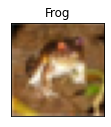

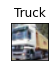

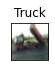

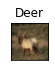

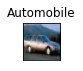

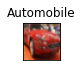

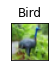

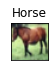

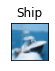

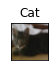

In [ ]:
#visualiztion
plt.figure(figsize=(8,10))
for i in range(10):
    plt.subplot(5, 2, i+1)
    plt.imshow(training_images[i])
    plt.title(labels[training_labels[i][0]])
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [ ]:
training_images = training_images/255
testing_images = testing_images/255

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(32,32,3)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Dense(len(np.unique(training_labels)), activation='softmax'),
])



In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 8, 8, 32)          0         
                                                                 
 flatten (Flatten)           (None, 2048)              0

**RMSprop**

In [ ]:
model.compile(optimizer='RMSprop', loss='sparse_categorical_crossentropy', metrics = ["accuracy"]) 

In [ ]:
history = model.fit(training_images, training_labels, epochs=10)


Epoch 1/10
1563/1563 [==============================] - 131s 84ms/step - loss: 1.1201 - accuracy: 0.6264
Epoch 2/10
1563/1563 [==============================] - 131s 84ms/step - loss: 1.0418 - accuracy: 0.6533
Epoch 3/10
1563/1563 [==============================] - 130s 83ms/step - loss: 0.9916 - accuracy: 0.6755
Epoch 4/10
1563/1563 [==============================] - 129s 83ms/step - loss: 0.9730 - accuracy: 0.6838
Epoch 5/10
1563/1563 [==============================] - 129s 83ms/step - loss: 0.9705 - accuracy: 0.6885
Epoch 6/10
1563/1563 [==============================] - 128s 82ms/step - loss: 0.9636 - accuracy: 0.6951
Epoch 7/10
1563/1563 [==============================] - 128s 82ms/step - loss: 0.9691 - accuracy: 0.6969
Epoch 8/10
1563/1563 [==============================] - 128s 82ms/step - loss: 0.9934 - accuracy: 0.6917
Epoch 9/10
1563/1563 [==============================] - 128s 82ms/step - loss: 1.0106 - accuracy: 0.6877
Epoch 10/10
1563/1563 [==============================] 

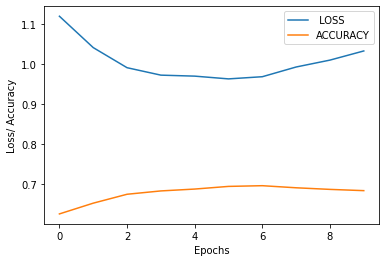

In [34]:
plt.plot(history.history['loss'], label=" LOSS")
plt.plot(history.history['accuracy'], label="ACCURACY")
plt.xlabel('Epochs')
plt.ylabel('Loss/ Accuracy')
plt.legend(loc='best')
plt.show()


In [ ]:
probs = model.predict(testing_images)
preds = np.argmax(probs, axis=1)

In [ ]:
print(accuracy_score(testing_labels, preds))

0.6134


In [ ]:
testing_labels=testing_labels.astype('float')
print(log_loss(testing_labels, probs))

1.352880158657649


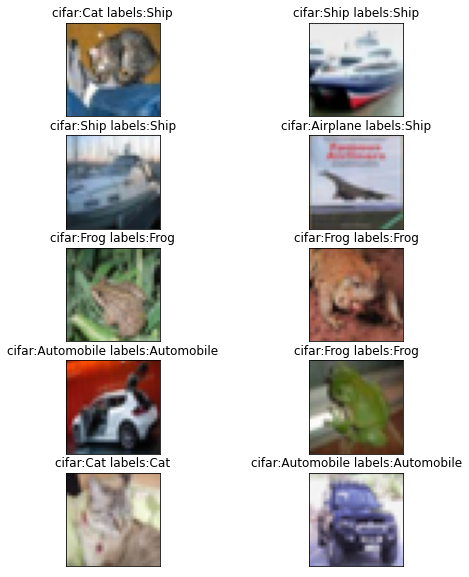

In [ ]:
plt.figure(figsize=(8,10))

for i in range(10):
    plt.subplot(5, 2, i+1)
    plt.imshow(testing_images[i])
    string = "cifar:"+ labels[testing_labels[i][0]] + " labels:" + labels[preds[i]] 
    plt.title(string)
    plt.xticks([])
    plt.yticks([])
    
plt.show()


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina